# 資料視覺化
## 許sir


- 在R中，有三個常用的畫圖套件，包括基本功能(Base)、lattice以及ggplot2
- 本文介紹基本功能(Base)及ggplot2

### [設定所需的函式庫(libraries)以及載入資料]

In [2]:
#install.packages("ggplot2")
rm()  #清除所有物件 
library(graphics)
#library(ggplot2)

#setwd("d:/Rdata Practice/R BasicLab") #設定工作區

### [Part 1].基本畫圖功能(Base)


### 1-1.Simple Plots-Bar plot


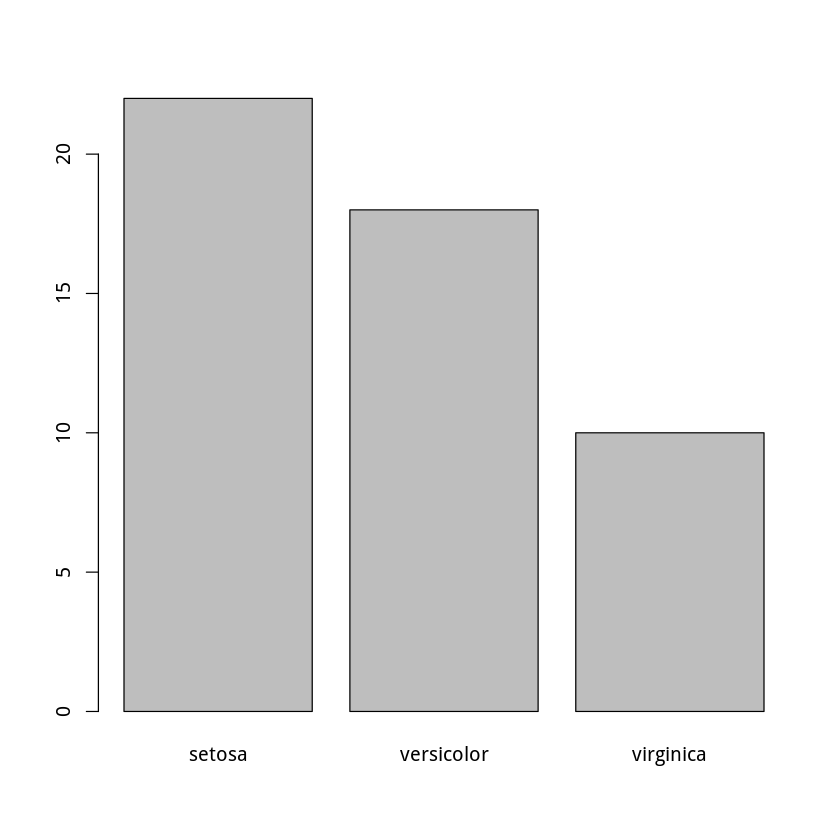

In [3]:
data(iris)
x=sample(1:150,50) #從1~150中隨機挑選50個數字
plot(iris[x,5])

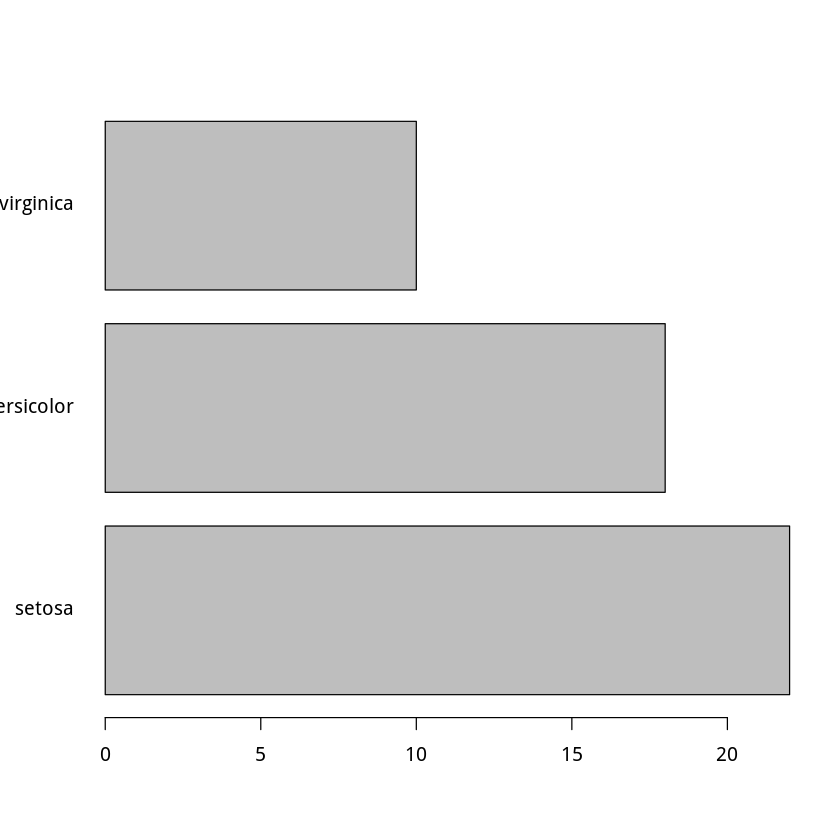

In [4]:
y=table(iris[x,5])
barplot(y,horiz=TRUE,las=1)

### 1-2. Simple Plots-Pie

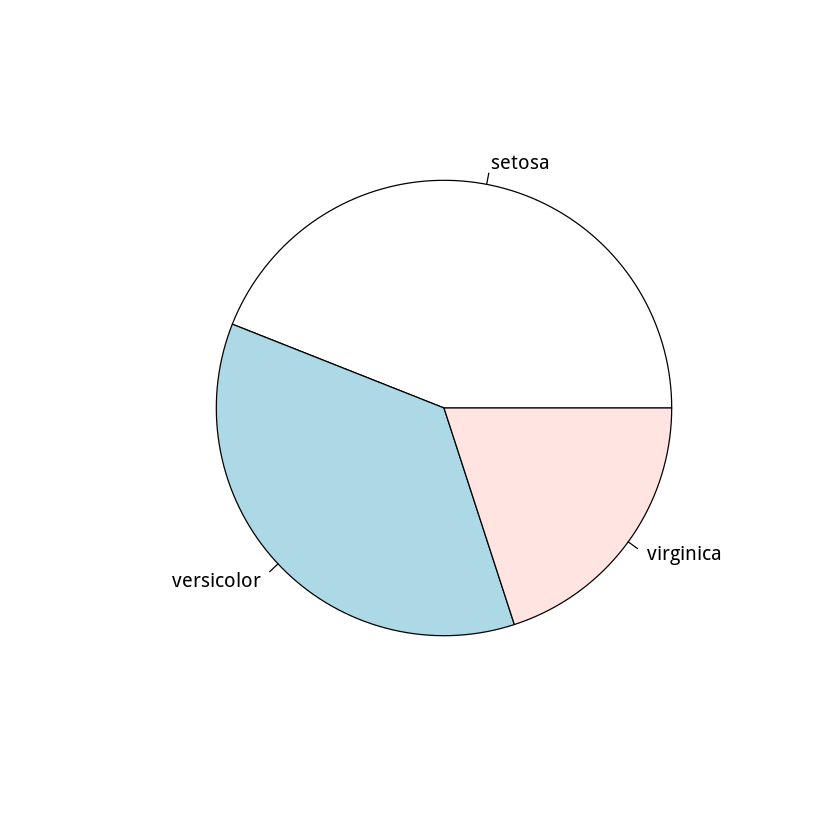

In [5]:
pie(y)

### 1-3. Simple Plots-Scatter Plot

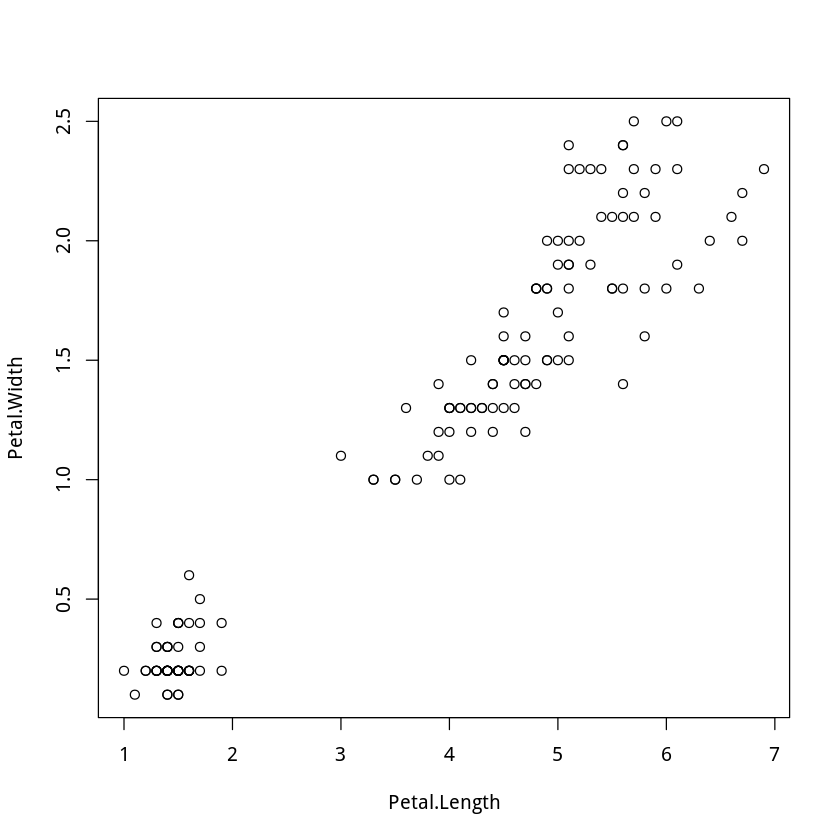

In [6]:
plot(iris[,3:4])

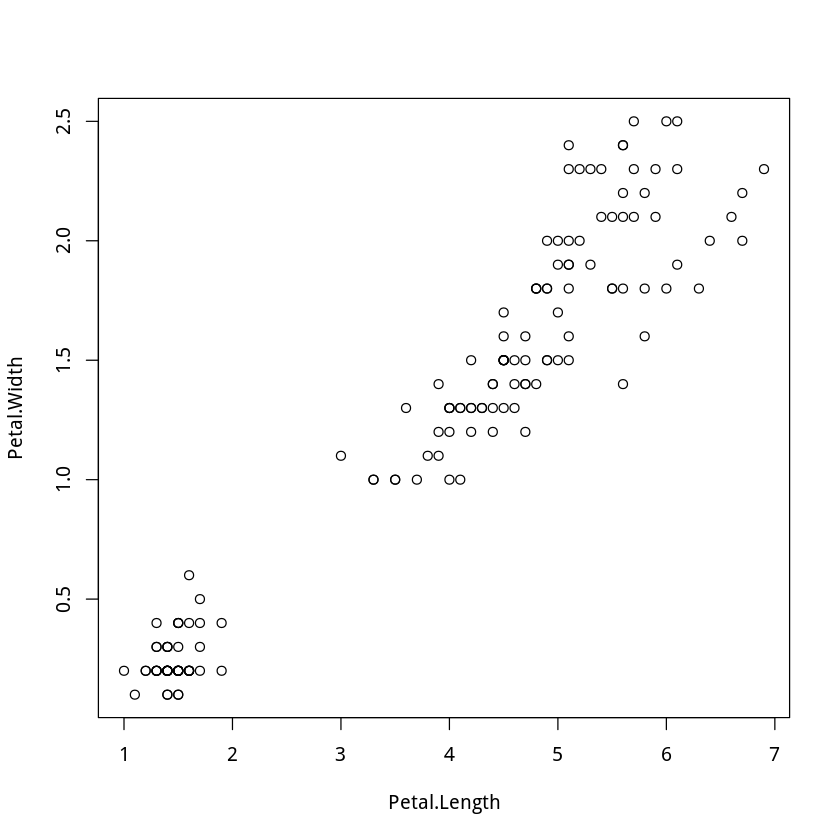

In [7]:
plot(Petal.Width~Petal.Length,data=iris)

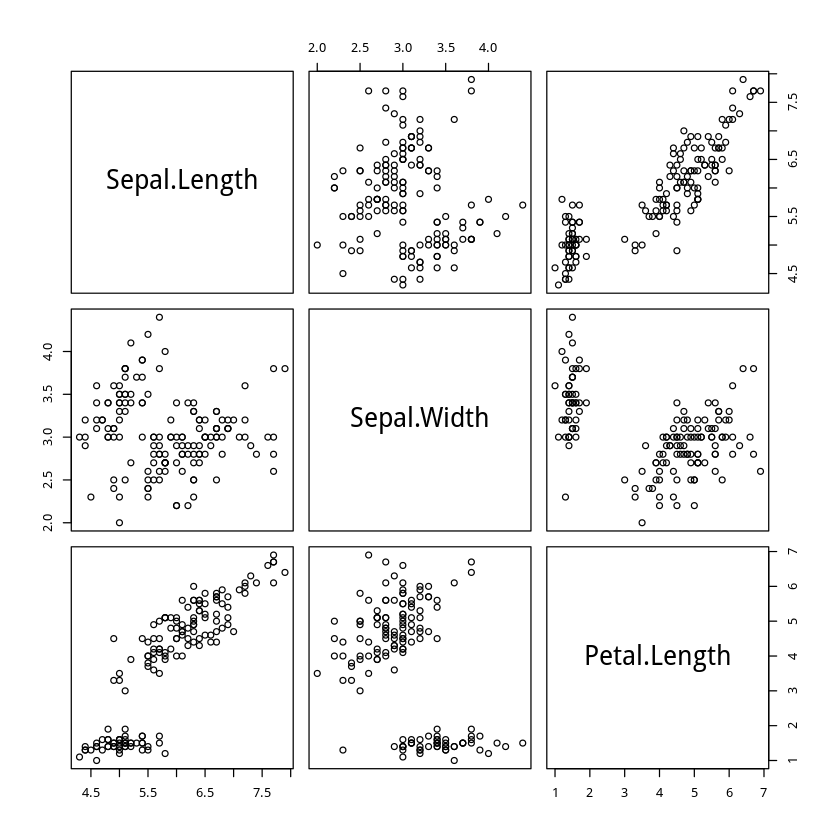

In [8]:
plot(iris[,1:3])
plot(~Sepal.Length+Sepal.Width+Petal.Length,data=iris)

### 1-4. Simple Plots-Box plot

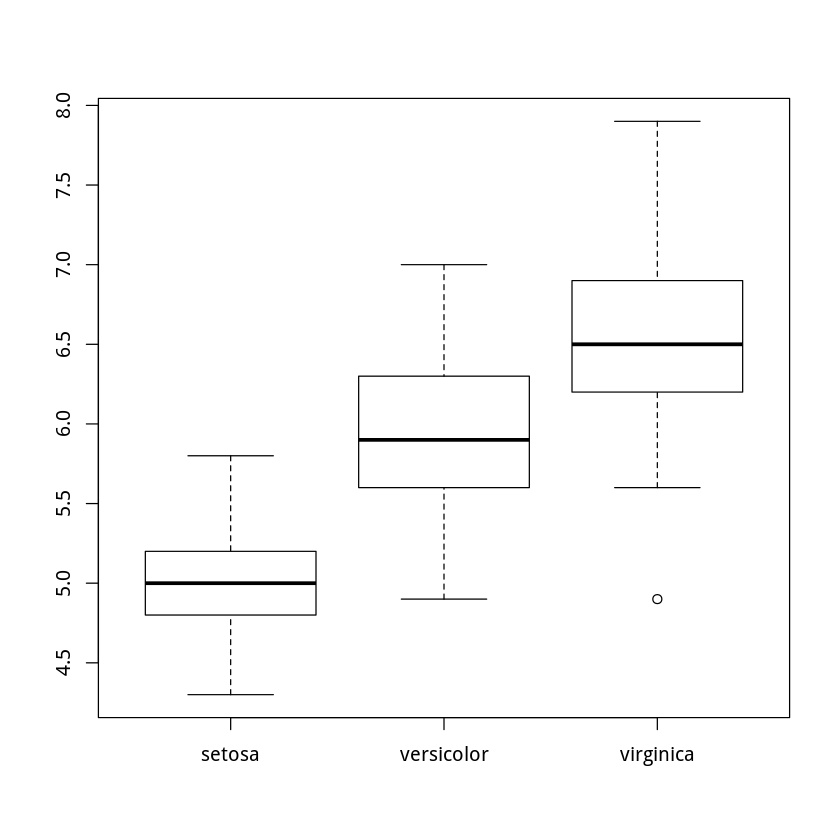

In [9]:
plot(iris[,5],iris[,1])

boxplot(iris[,1]~iris[,5])

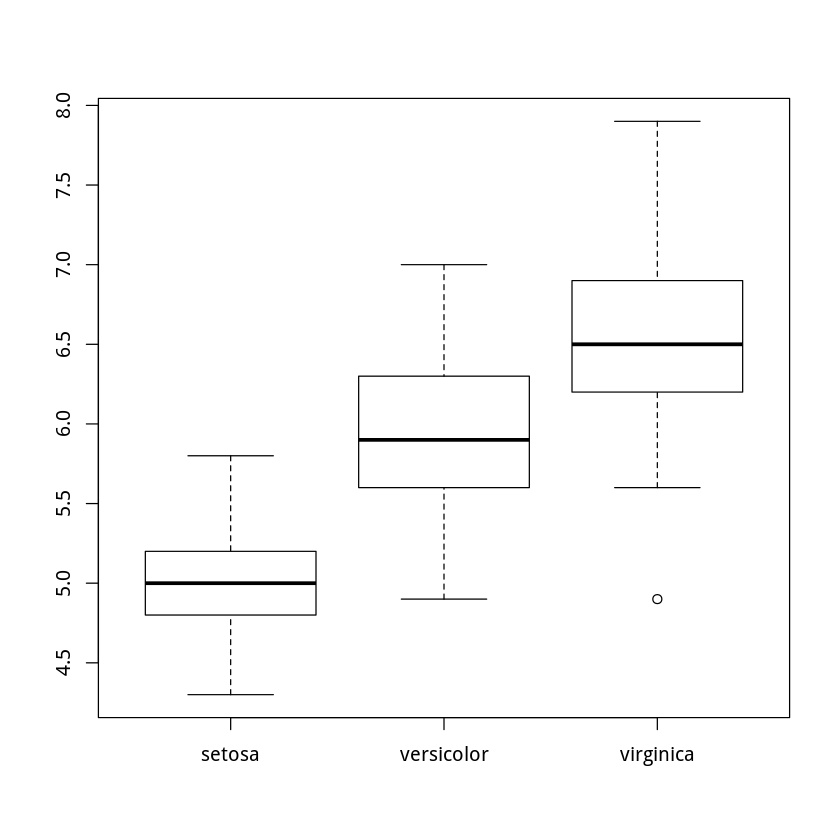

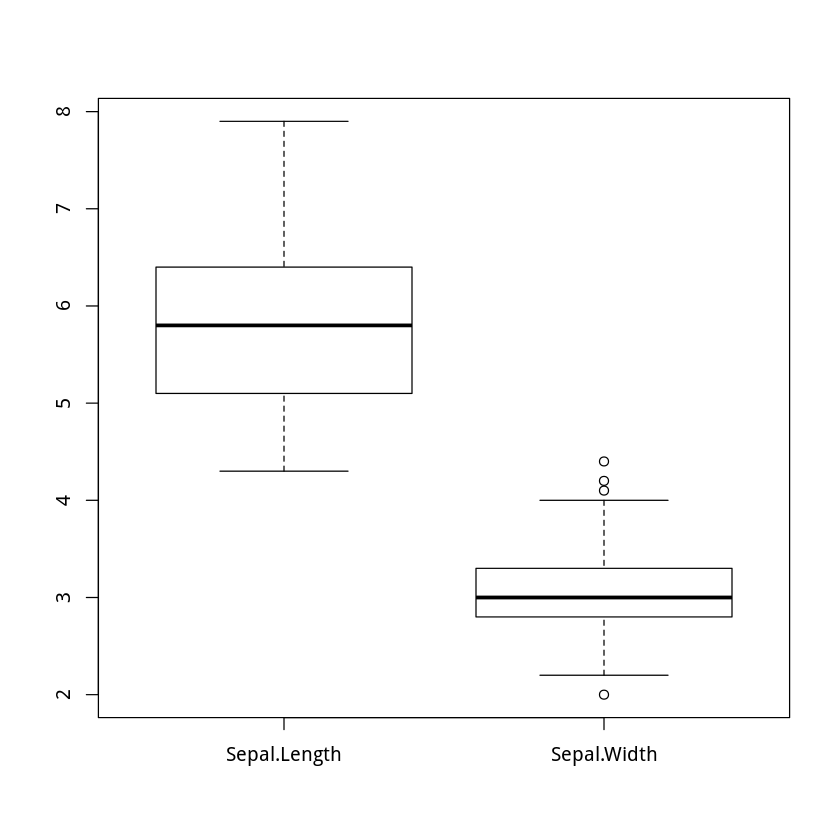

In [10]:
boxplot(Sepal.Length~Species,data=iris)

boxplot(iris[,1:2])

### 1-5. Simple Plots-Histgram

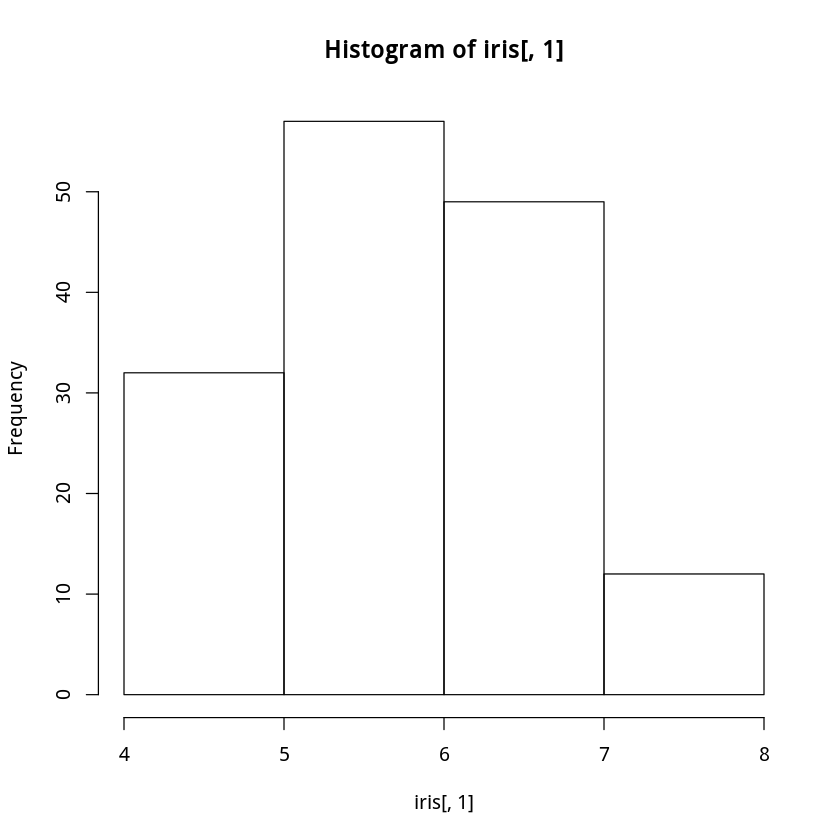

In [11]:
hist(iris[, 1], breaks = 4)

### 1-6. 如果我想要畫很多張圖在一個頁面上

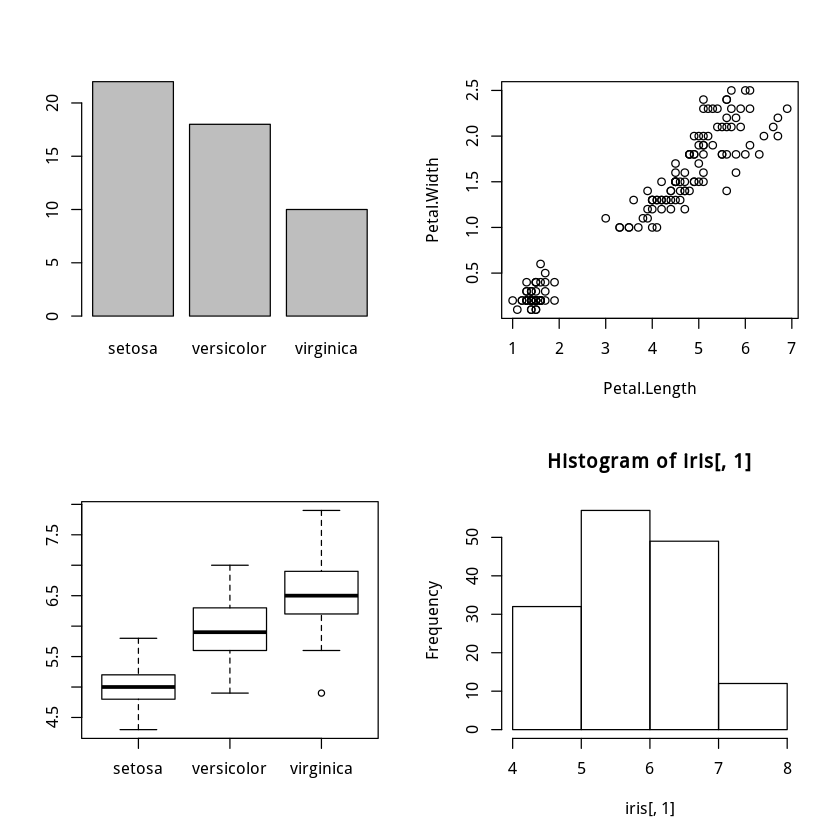

In [12]:
par(mfrow=c(2,2))
plot(iris[x,5])
plot(Petal.Width~Petal.Length,data=iris)
boxplot(Sepal.Length~Species,data=iris)
hist(iris[, 1], breaks = 4)

In [13]:
dev.off()#把圖型清除

null device 
          1

### [Part 2]. 採用ggplot2套件
- 在Anaconda中要用conda install -c r r-ggplot2 
- 若無法解決, 在R中用 update.packages(checkBuilt=TRUE, ask=FALSE) 試看看

In [7]:
#install.packages("ggplot2")
#install.packages('ggplot2',repos='http://cran.us.r-project.org')
#install.packages("ggplot2", dependencies=TRUE)
library(ggplot2)

### ggplot2基本的用法長這樣，其中每個欄位的值如下：

- data: 資料的來源，通常會一個 dataframe
- aex: 資料各個維度的值
- geom_xxx(): 想要做圖的類型，可以有直線，點，長條圖等等

In [8]:
require(datasets)
head(airquality) #空氣品質的資料集airquality

Ozone,Solar.R,Wind,Temp,Month,Day
41,190,7.4,67,5,1
36,118,8.0,72,5,2
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5
28,NA,14.9,66,5,6


In [9]:
require(ggplot2)
# library 與 require 都是載入 package，但是最大的差別在於，library 如果是載入的 package 不存在，是會發生 error 程式停止，但是 require 卻不會。

### 2-1.第ㄧ種方式 qplot()

這是ggplot2裡面比較簡易的函式，使用上很像plot()的觀念，不同的是，我們可以單純利用這個函式，改變其中geom的參數，就能畫出直方圖、散佈圖、合鬚圖…等等圖形。



Warning message:
“Removed 37 rows containing non-finite values (stat_bin).”

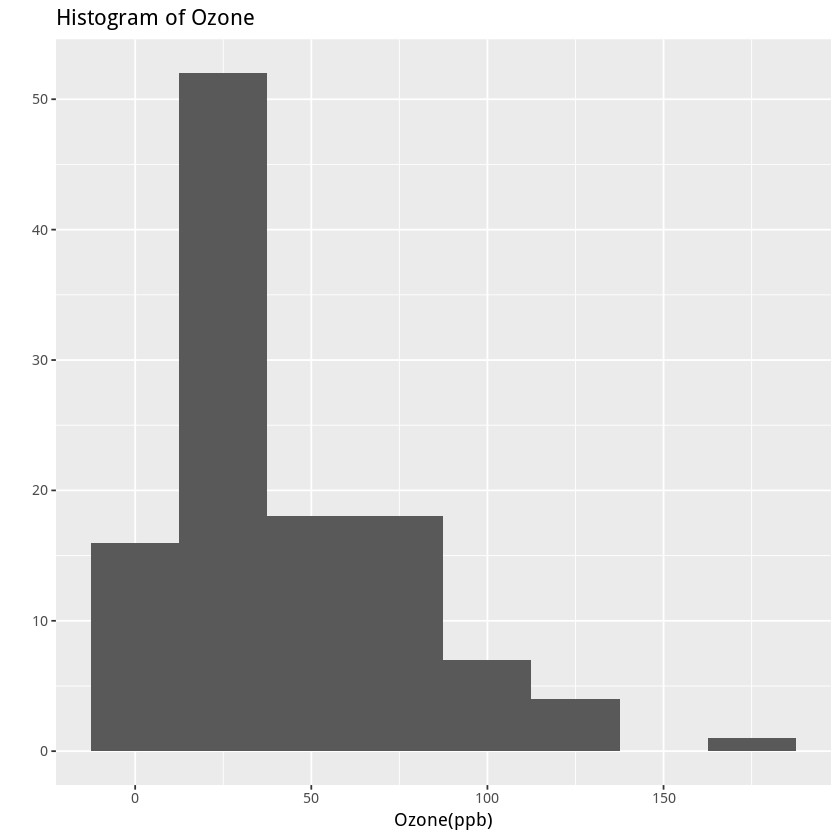

In [10]:
qplot(x=Ozone,                      
      data=airquality,              
      geom="histogram",             # 圖形=histogram
      main = "Histogram of Ozone",  
      xlab="Ozone(ppb)",            
      binwidth = 25,                # 每25單位為一區隔
      fill= Month                   # 以顏色標註月份，複合式的直方圖
      )

Warning message:
“Removed 37 rows containing missing values (geom_point).”

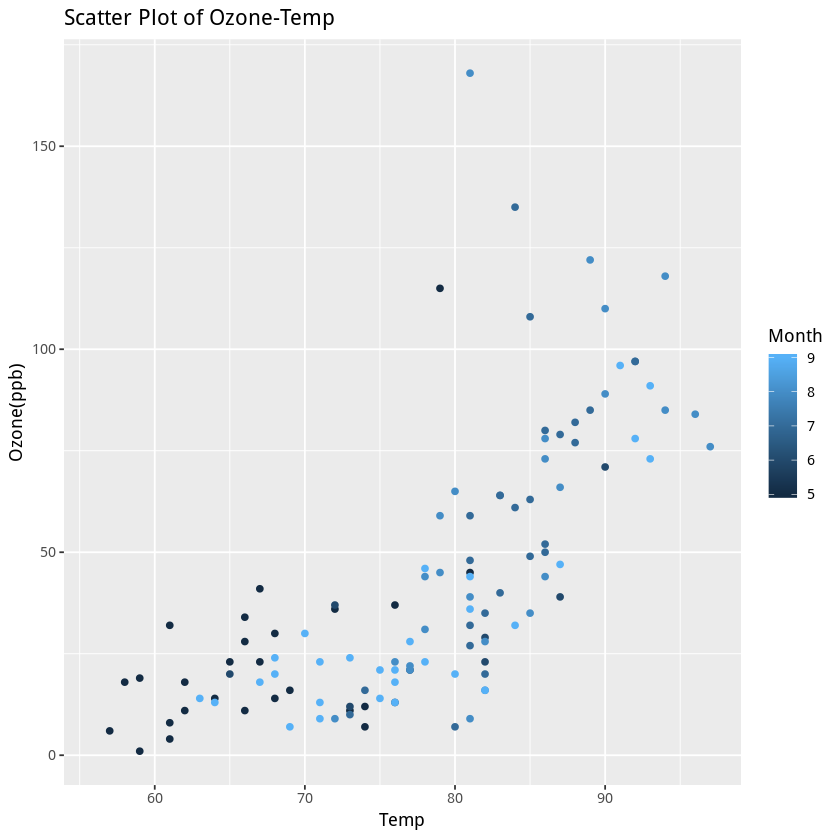

In [11]:
qplot(x=Temp,                               
      y=Ozone,                              
      data=airquality,                      
      geom="point",                         # 圖形=scatter plot
      main = "Scatter Plot of Ozone-Temp",  
      xlab="Temp",                          
      ylab="Ozone(ppb)",                    
      color= Month                          # 以顏色標註月份，複合式的散布圖
      )

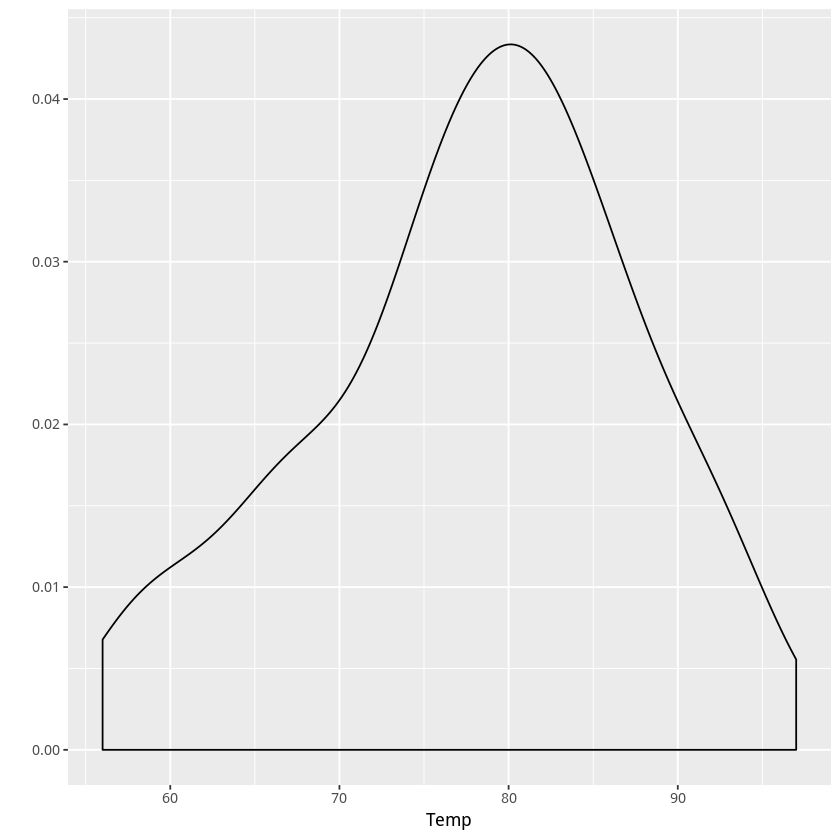

In [12]:
qplot(x=Temp,                             
      data=airquality,                     
      geom="density",        # 圖形=density
      xlab="Temp",                         
      color= Month           # 以顏色標註月份，複合式的機率密度圖
)

Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”Warning message:
“Removed 37 rows containing non-finite values (stat_boxplot).”

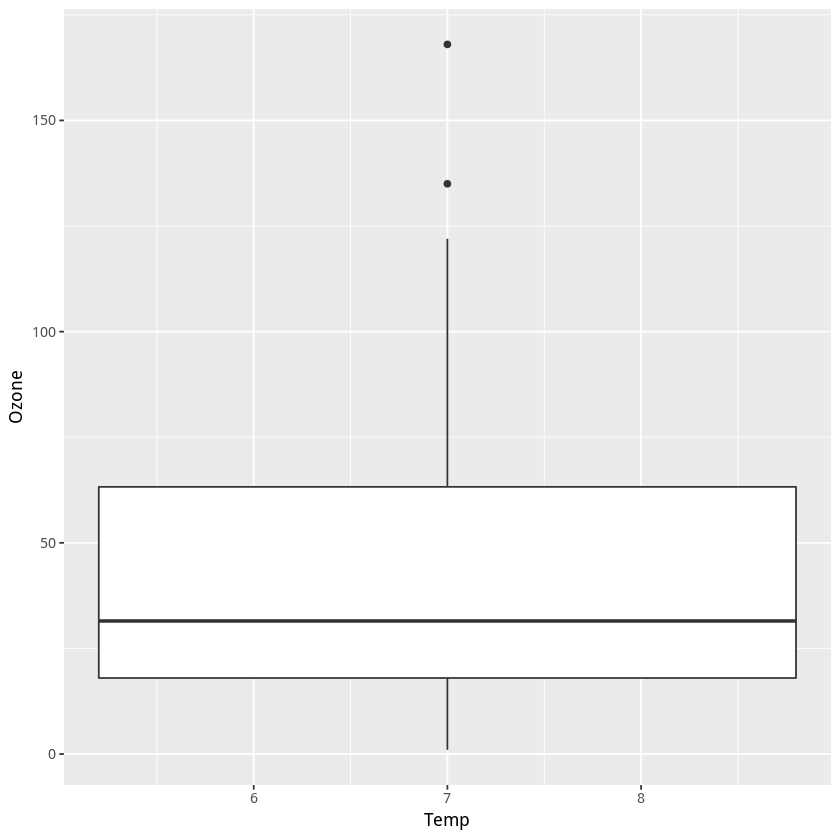

In [13]:
qplot(x=Month,                               
      y=Ozone,
      data=airquality,                     
      geom="boxplot",       # 圖形=boxplot
      xlab="Temp",                          
      color= Month          # 以顏色標註月份，複合式的合鬚圖
)

### 2-2. 第二種方式 ggplot()

- 另外一個函式叫做ggplot()，就是使用「圖形的文法」來進行繪圖。
- 比起qplot()，ggplot()需要自己進行各種設定(美學/幾何)，雖然學習上比較複雜一點，卻也因此更加有彈性(flexible)和客製化(customized)的表現。

### [有關geom()]

在開始檢視不同樣式的資料探索圖形之前，我們用下表對這些geom()有一個概觀：

- geom_	圖形
- geom_histogram()	直方圖
- geom_boxplot()	盒鬚圖
- geom_line()	線圖
- geom_point()	散佈圖
- geom_bar()	長條圖
- stat_function(fun, geom = "line")	曲線圖


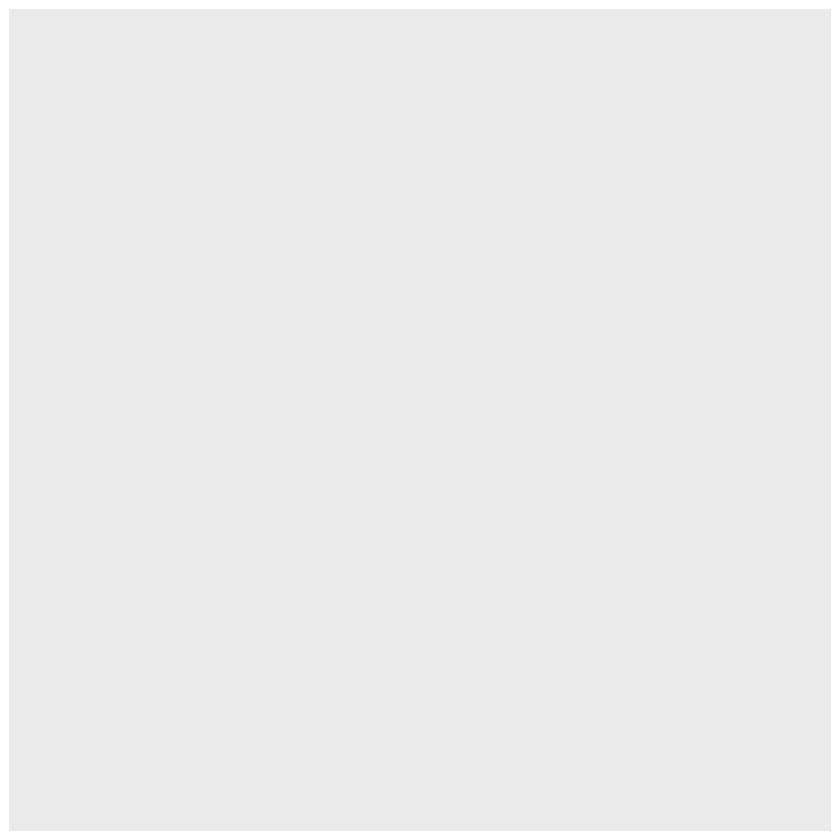

In [15]:
# 準備一個畫布，資料集=airquality
 canvas<- ggplot(data=airquality)
canvas

### *基本概念是準備好畫布(canvas)，因此接下來我們要用geom()，決定要繪製何種圖表*。

### 「白話文說明」
- 我們其實是用+符號，來連接不同的圖層(canvas、幾何圖表、美學表現)，所有圖層最後會呈現在圖表上
- ggplot( ) <-這是畫布
- geom_point( ) <- 這是你希望他做什麼動作
- geom_point(data=你的資料名稱,aes(x=橫軸放的東西,y=縱軸放的東西))
- 如果希望按照是在哪一個州可以加color=Continent

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 37 rows containing non-finite values (stat_bin).”

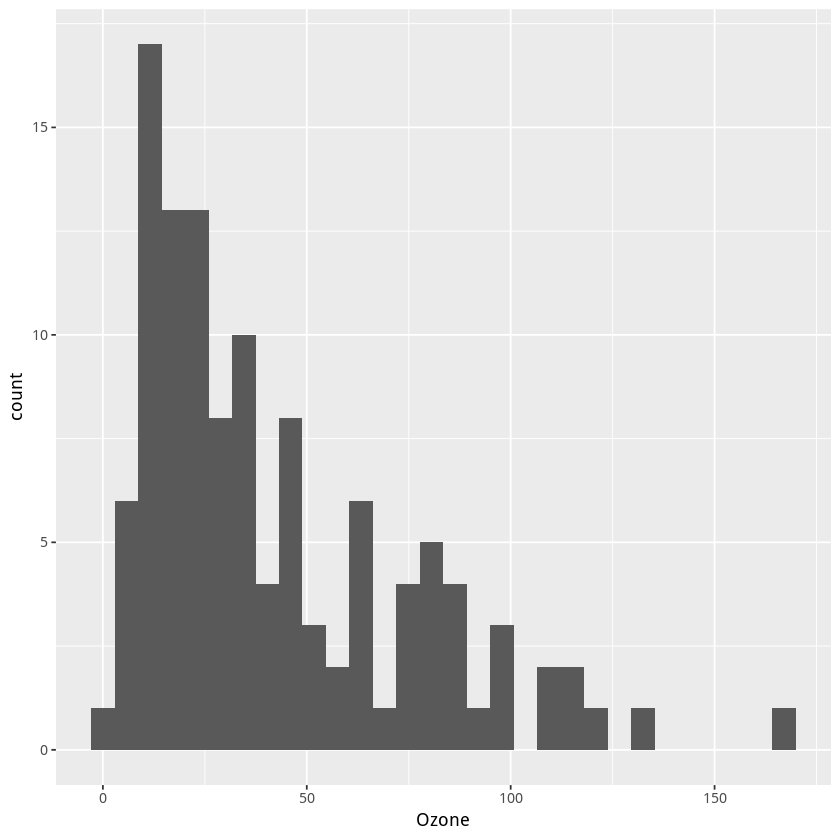

In [16]:
# 方才準備的畫布
canvas +
    # 以直方圖的圖形呈現資料
    geom_histogram(aes(x=Ozone,     # X 放Ozone
                       fill=Month   # 根據月份顯示不同的顏色   
                       ) 
                   )     

### 要每一個月份，分別畫一張直方圖的話，可以使用facet()函式。



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 37 rows containing non-finite values (stat_bin).”

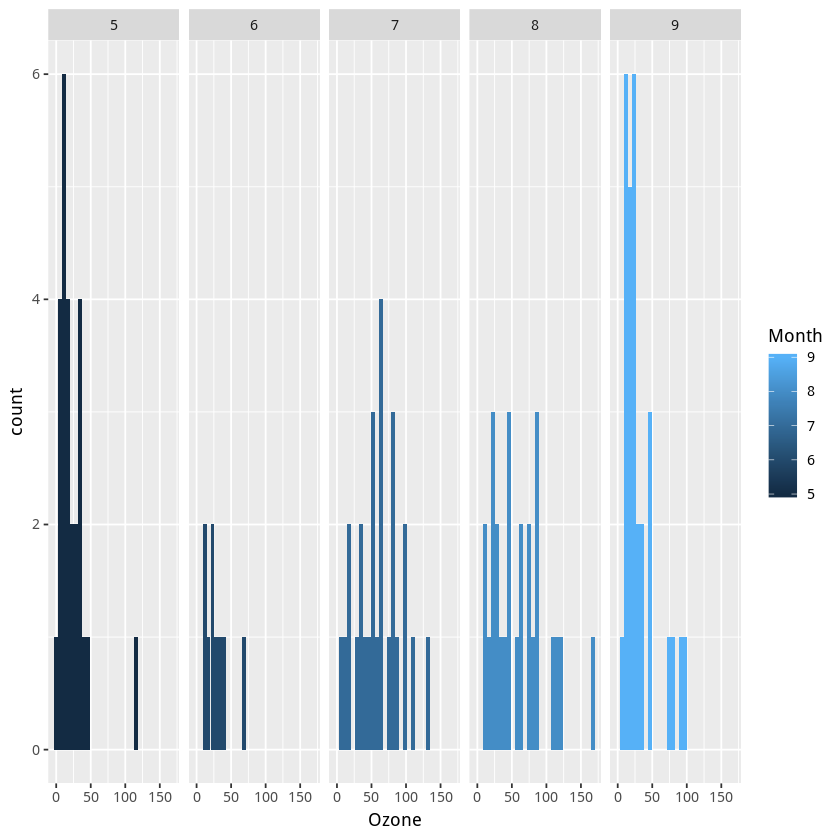

In [17]:
# 方才準備的畫布
canvas +
    # 以直方圖的圖形呈現資料
    geom_histogram(aes(x=Ozone,
                       fill=Month)  # 以粉紅色填滿         
                   ) +
    
    # 用facet()，分別各畫一張各月份的直方圖
    facet_grid(.~Month)   # 因為Month放在右邊，故圖片以水平方向呈現

Warning message:
“Ignoring unknown aesthetics: main”`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
“Removed 37 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 37 rows containing missing values (geom_point).”

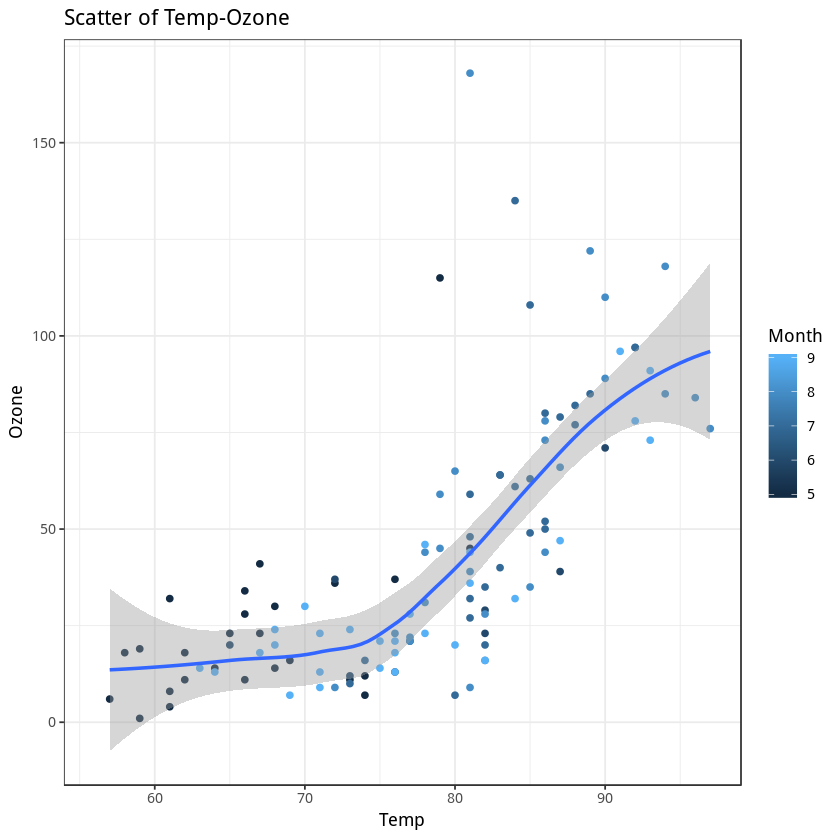

In [18]:
# 準備畫布
ggplot(data=airquality) +   
    
    # 散布圖對應的函式是geom_point()
    geom_point(aes(x=Temp,  # 用aes()，描繪散布圖內的各種屬性
                   y=Ozone,
                   main="Scatter Plot of Ozone-Temp",
                   color=Month) 
               ) + 
    # 用geom_smooth()加上趨勢線
    geom_smooth(aes(x=Temp,
                    y=Ozone)) +
    
    # 用labs()，進行文字上的標註(Annotation)
    labs(title="Scatter of Temp-Ozone",
         x="Temp",
         y="Ozone") +
    
    # 用theme_bw(background white)，改變主題背景成白色
    # 更多背景設定： http://docs.ggplot2.org/current/ggtheme.html            
    theme_bw()          

Warning message:
“Removed 1 rows containing missing values (geom_path).”

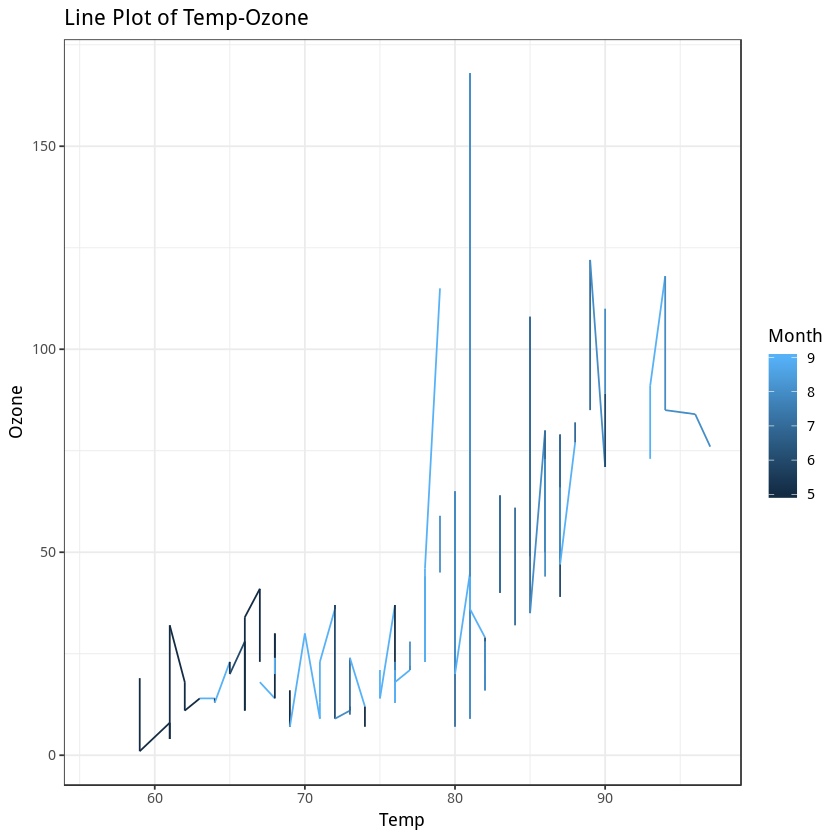

In [19]:
#我們也可以改用畫線的方式，呈現資料
ggplot(data=airquality) +   
    
    # 要畫線的話，對應的函式是geom_line()
    geom_line(aes(x=Temp,  
                   y=Ozone,
                   color=Month) 
               ) +
    
    # 用labs()，進行文字上的標註(Annotation)
    labs(title="Line Plot of Temp-Ozone",
         x="Temp",
         y="Ozone") +
    
    theme_bw()

Warning message:
“Ignoring unknown aesthetics: main”Warning message:
“Removed 37 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_path).”

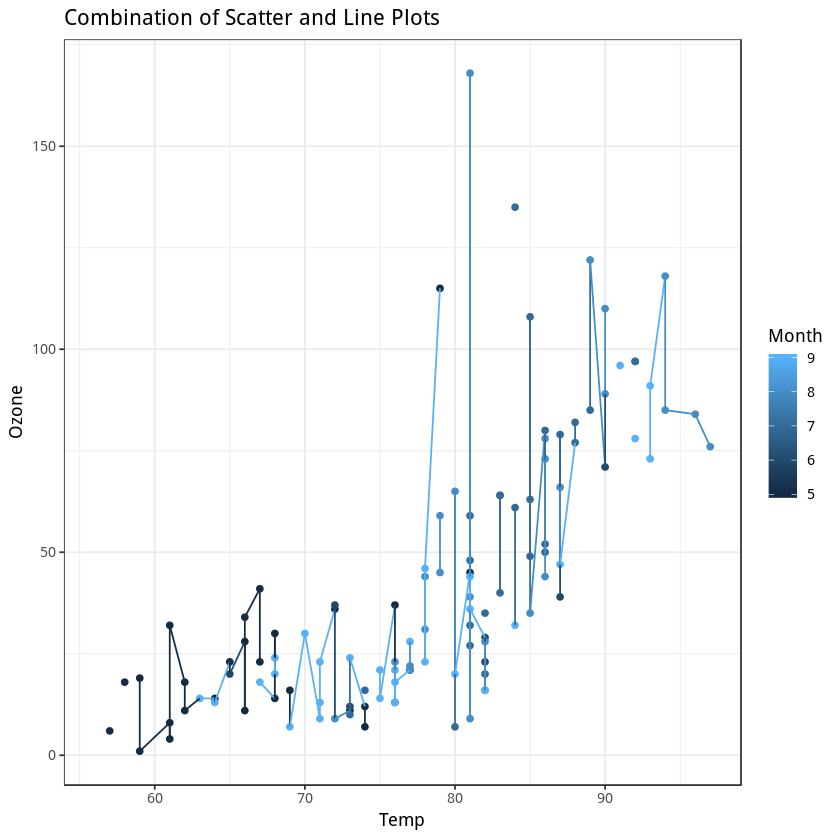

In [20]:
#把上面那兩張圖，合併在一起
# 準備畫布
ggplot(data=airquality) +   
    
    # 散布圖對應的函式是geom_point()
    geom_point(aes(x=Temp,  
                   y=Ozone,
                   main="Scatter Plot of Ozone-Temp",
                   color=Month) 
               ) + 
    # 要畫線的話，對應的函式是geom_line()
    geom_line(aes(x=Temp,  
                   y=Ozone,
                   color=Month) 
               ) + 

    # 用labs()，進行文字上的標註(Annotation)
    labs(title="Combination of Scatter and Line Plots",
         x="Temp",
         y="Ozone") +
    
    theme_bw()

### 參考資料
- https://ggplot2.tidyverse.org/reference/
- https://yijutseng.github.io/DataScienceRBook/vis.html
- https://rpubs.com/mccannecology/53464
- https://rpubs.com/skydome20/R-Note4-Plotting_System